# Porto Seguro’s Safe Driver Prediction

Problem Statement

You’re challenged to build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year for an auto insurance company.

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('./datasets/train.csv', index_col=0, na_values=-1, encoding='utf-8')
df_test = pd.read_csv('./datasets/test.csv', index_col=0, na_values=-1, encoding='utf-8')

In [3]:
df_train

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2.0,5,1.0,0.0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1.0,7,0.0,0.0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4.0,9,1.0,0.0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1.0,2,0.0,0.0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2.0,0,1.0,0.0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488013,0,3,1.0,10,0.0,0.0,0,0,0,1,...,4,1,9,6,0,1,1,0,1,1
1488016,0,5,1.0,3,0.0,0.0,0,0,0,1,...,4,1,3,8,1,0,1,0,1,1
1488017,0,1,1.0,10,0.0,0.0,1,0,0,0,...,3,2,2,6,0,0,1,0,0,0


In [4]:
df_test

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
0,0,1.0,8,1.0,0.0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2.0,5,1.0,0.0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1.0,3,0.0,0.0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1.0,6,0.0,0.0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1.0,7,0.0,0.0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488022,0,1.0,6,0.0,0.0,0,1,0,0,0,...,4,2,3,4,0,1,0,0,1,0
1488023,5,3.0,5,1.0,0.0,0,0,1,0,0,...,6,2,2,11,0,0,1,1,0,0
1488024,0,1.0,5,0.0,0.0,1,0,0,0,0,...,5,2,2,11,0,1,1,0,0,0


In [5]:
# concat both dataframes to do data cleaning first

In [6]:
df = pd.concat([df_train, df_test], axis=0)

In [7]:
df.shape

(1488028, 58)

## Handle Missing Values

In [8]:
df

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0.0,2,2.0,5,1.0,0.0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0.0,1,1.0,7,0.0,0.0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0.0,5,4.0,9,1.0,0.0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0.0,0,1.0,2,0.0,0.0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0.0,0,2.0,0,1.0,0.0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488022,NaN,0,1.0,6,0.0,0.0,0,1,0,0,...,4,2,3,4,0,1,0,0,1,0
1488023,NaN,5,3.0,5,1.0,0.0,0,0,1,0,...,6,2,2,11,0,0,1,1,0,0
1488024,NaN,0,1.0,5,0.0,0.0,1,0,0,0,...,5,2,2,11,0,1,1,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1488028 entries, 7 to 1488026
Data columns (total 58 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   target          595212 non-null   float64
 1   ps_ind_01       1488028 non-null  int64  
 2   ps_ind_02_cat   1487505 non-null  float64
 3   ps_ind_03       1488028 non-null  int64  
 4   ps_ind_04_cat   1487800 non-null  float64
 5   ps_ind_05_cat   1473509 non-null  float64
 6   ps_ind_06_bin   1488028 non-null  int64  
 7   ps_ind_07_bin   1488028 non-null  int64  
 8   ps_ind_08_bin   1488028 non-null  int64  
 9   ps_ind_09_bin   1488028 non-null  int64  
 10  ps_ind_10_bin   1488028 non-null  int64  
 11  ps_ind_11_bin   1488028 non-null  int64  
 12  ps_ind_12_bin   1488028 non-null  int64  
 13  ps_ind_13_bin   1488028 non-null  int64  
 14  ps_ind_14       1488028 non-null  int64  
 15  ps_ind_15       1488028 non-null  int64  
 16  ps_ind_16_bin   1488028 non-null  in

In [10]:
df.isna().sum()

target             892816
ps_ind_01               0
ps_ind_02_cat         523
ps_ind_03               0
ps_ind_04_cat         228
ps_ind_05_cat       14519
ps_ind_06_bin           0
ps_ind_07_bin           0
ps_ind_08_bin           0
ps_ind_09_bin           0
ps_ind_10_bin           0
ps_ind_11_bin           0
ps_ind_12_bin           0
ps_ind_13_bin           0
ps_ind_14               0
ps_ind_15               0
ps_ind_16_bin           0
ps_ind_17_bin           0
ps_ind_18_bin           0
ps_reg_01               0
ps_reg_02               0
ps_reg_03          269456
ps_car_01_cat         267
ps_car_02_cat          10
ps_car_03_cat     1028142
ps_car_04_cat           0
ps_car_05_cat      666910
ps_car_06_cat           0
ps_car_07_cat       28820
ps_car_08_cat           0
ps_car_09_cat        1446
ps_car_10_cat           0
ps_car_11_cat           0
ps_car_11               6
ps_car_12               1
ps_car_13               0
ps_car_14          106425
ps_car_15               0
ps_calc_01  

In [11]:
# find out percentages of missing values in each column

for i in df.columns:
    print(f"{df[{i}].isna().sum()/len(df)*100}")
    print('-----------------------------')

target    59.999946
dtype: float64
-----------------------------
ps_ind_01    0.0
dtype: float64
-----------------------------
ps_ind_02_cat    0.035147
dtype: float64
-----------------------------
ps_ind_03    0.0
dtype: float64
-----------------------------
ps_ind_04_cat    0.015322
dtype: float64
-----------------------------
ps_ind_05_cat    0.975721
dtype: float64
-----------------------------
ps_ind_06_bin    0.0
dtype: float64
-----------------------------
ps_ind_07_bin    0.0
dtype: float64
-----------------------------
ps_ind_08_bin    0.0
dtype: float64
-----------------------------
ps_ind_09_bin    0.0
dtype: float64
-----------------------------
ps_ind_10_bin    0.0
dtype: float64
-----------------------------
ps_ind_11_bin    0.0
dtype: float64
-----------------------------
ps_ind_12_bin    0.0
dtype: float64
-----------------------------
ps_ind_13_bin    0.0
dtype: float64
-----------------------------
ps_ind_14    0.0
dtype: float64
-----------------------------
ps_ind_1

In [12]:
x_list=[]
y_list=[]

for i in df.columns:
    if df[i].isna().sum()/len(df)*100 != 0:
        x_list.append(i)
        y_list.append(df[i].isna().sum()/len(df)*100)        

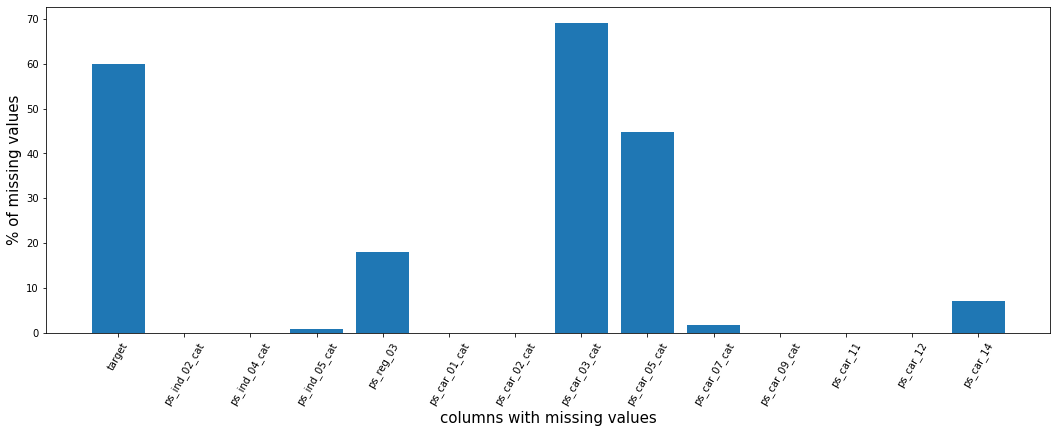

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
plt.bar(x_list, y_list)
plt.xticks(rotation=60)
plt.xlabel('columns with missing values', size=15)
plt.ylabel('% of missing values', size=15)
plt.show()

In [14]:
# remove 'target' column, we are not going to fill in missing values in 'target'!!! 

x_list = x_list[1:]
y_list = y_list[1:]

In [15]:
import numpy as np

for i,e in enumerate(y_list):
    
    if e >= 30:
        df = df.drop([x_list[i]], axis=1)
        
    else:
        if 'cat' in x_list[i] or 'bin' in x_list[i] or df[x_list[i]].dtype == 'int64':
            
            s = df[x_list[i]].value_counts(normalize=True)
            df.loc[df[x_list[i]].isna(), x_list[i]] = np.random.choice(s.index, p=s.values, size=df[x_list[i]].isna().sum())
        
        else: 
            
            df[x_list[i]].fillna(df[x_list[i]].mean(), inplace=True)

In [16]:
df.isna().sum()        # Good!!!!

target            892816
ps_ind_01              0
ps_ind_02_cat          0
ps_ind_03              0
ps_ind_04_cat          0
ps_ind_05_cat          0
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03              0
ps_car_01_cat          0
ps_car_02_cat          0
ps_car_04_cat          0
ps_car_06_cat          0
ps_car_07_cat          0
ps_car_08_cat          0
ps_car_09_cat          0
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              0
ps_car_12              0
ps_car_13              0
ps_car_14              0
ps_car_15              0
ps_calc_01             0
ps_calc_02             0
ps_calc_03             0
ps_calc_04             0


### Convert categorical data by get_dummies

In [17]:
categorical = []
for i in df.columns:
    if 'cat' in i or 'bin' in i or df[i].dtype == 'int64':
        categorical.append(i)

In [18]:
categorical

['ps_ind_01',
 'ps_ind_02_cat',
 'ps_ind_03',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [19]:
dummy = []
for k in categorical:
    df_k = pd.get_dummies(df[k], drop_first=True)
    dummy.append(df_k)

In [20]:
df_dummy = pd.concat(dummy, axis=1)

In [21]:
df = pd.concat([df, df_dummy], axis=1)

In [22]:
%%time
# drop the original categorical columns
for i in categorical:
    df = df.drop([i], axis=1)

CPU times: user 32.3 s, sys: 34.4 s, total: 1min 6s
Wall time: 1min 22s


In [23]:
df.shape

(1488028, 366)

In [24]:
df

,target,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,...,21.0,22.0,23.0,28.0,1.0,1.0,1.0,1.0,1.0,1.0
id,,,,,,,,,,,,,,,,,,,,,
7,0.0,0.7,0.2,0.718070,2.0,0.400000,0.883679,0.370810,3.605551,0.6,...,0,0,0,0,0,1,1,0,0,1
9,0.0,0.8,0.4,0.766078,3.0,0.316228,0.618817,0.388716,2.449490,0.3,...,0,0,0,0,0,1,1,0,1,0
13,0.0,0.0,0.0,0.894556,1.0,0.316228,0.641586,0.347275,3.316625,0.5,...,0,0,0,0,0,1,1,0,1,0
16,0.0,0.9,0.2,0.580948,1.0,0.374166,0.542949,0.294958,2.000000,0.6,...,0,0,0,0,0,0,0,0,0,0
17,0.0,0.7,0.6,0.840759,3.0,0.316070,0.565832,0.365103,2.000000,0.4,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488022,NaN,0.5,0.3,1.048809,2.0,0.565685,1.528774,0.565685,3.605551,0.3,...,0,0,0,0,0,1,0,0,1,0
1488023,NaN,0.7,1.0,1.246495,2.0,0.424264,1.040567,0.418569,3.741657,0.3,...,0,0,0,0,0,0,1,1,0,0
1488024,NaN,0.4,0.0,0.609303,2.0,0.374166,0.968992,0.390384,3.741657,0.3,...,0,0,0,0,0,1,1,0,0,0


## Splitting data back to training and testing sets

In [25]:
# When we concat the df_train and df_test at the very beginning, since df_test has no 'target' column,
# so, 'NAN' is automatically filled in.
# Now, when we need to split the df back into the df_train and df_test,
# we need to drop the 'NAN' 'target' column.

In [26]:
df_train = df.iloc[:595212, :]
df_test = df.iloc[595212:, 1:]

In [27]:
print(df_train.shape)
print(df_test.shape)

(595212, 366)
(892816, 365)


## Fixing Imbalance Data by up-scaling

In [28]:
# up-scaling the training set only
# coz no 'target' column in testing set
df_train.target.value_counts()

0.0    573518
1.0     21694
Name: target, dtype: int64

In [29]:
df_train.target.value_counts(normalize=True)   # highly imbalance!!!

0.0    0.963552
1.0    0.036448
Name: target, dtype: float64

In [30]:
# class count

train_majority, train_minority = df_train.target.value_counts()

In [31]:
# divide by class

df_train_majority = df_train[df_train['target'] == 0]
df_train_minority = df_train[df_train['target'] == 1]

In [32]:
# scale up the minority

df_train_minority_up = df_train_minority.sample(train_majority, replace=True)

In [33]:
# concat to form a new/final dataframe

df_train_final = pd.concat([df_train_majority, df_train_minority_up], axis=0)

In [34]:
print('df_train_final')
print(df_train_final.shape)

df_train_final
(1147036, 366)


In [35]:
print('df_train_final')
print(df_train_final.target.value_counts(normalize=True))    # imbalance problem solved!!!

df_train_final
0.0    0.5
1.0    0.5
Name: target, dtype: float64


## Further Split the data in the training dataframe (df_train_final) into training and testing set for model training and evaluating the performance of the model !!!
### a bit complicated !!!

In [36]:
x = df_train_final.drop('target', axis=1)
y = df_train_final['target']

In [37]:
# split data into training & testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

## Feature Scaling

In [38]:
# scale the training and testing data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# scale the df_test as well
df_test = scaler.transform(df_test)

## Random Forest

In [39]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=300, max_depth=20, n_jobs=-1,random_state=42)
model.fit(x_train, y_train)

CPU times: user 58min 36s, sys: 37.1 s, total: 59min 13s
Wall time: 19min 15s


RandomForestClassifier(max_depth=20, n_estimators=300, n_jobs=-1,
                       random_state=42)

In [40]:
y_pred_rf = model.predict(x_test)

### Model Evaluation

In [41]:
from sklearn.metrics import classification_report
print("Testing Report")
print("--------------")
print(classification_report(y_test, y_pred_rf))

Testing Report
--------------
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95    114840
         1.0       0.96      0.93      0.95    114568

    accuracy                           0.95    229408
   macro avg       0.95      0.95      0.95    229408
weighted avg       0.95      0.95      0.95    229408



## Finally - Answer the problem statement

In [42]:
%%time
pred_probability = model.predict_proba(df_test)

CPU times: user 2min 41s, sys: 9.97 s, total: 2min 51s
Wall time: 1min 28s


In [43]:
pred_probability

array([[0.65337025, 0.34662975],
       [0.63378914, 0.36621086],
       [0.59580925, 0.40419075],
       ...,
       [0.5930335 , 0.4069665 ],
       [0.60678136, 0.39321864],
       [0.66614981, 0.33385019]])

In [44]:
result = pd.DataFrame(pred_probability, columns=['prob_not_applied', 'prob_applied'])

In [45]:
result

,prob_not_applied,prob_applied
0,0.653370,0.346630
1,0.633789,0.366211
2,0.595809,0.404191
3,0.711617,0.288383
4,0.532934,0.467066
...,...,...
892811,0.554358,0.445642
892812,0.509633,0.490367
892813,0.593034,0.406966
892814,0.606781,0.393219


In [46]:
#result.to_csv('./datasets/result.csv')

In [47]:
# in case next time you would like to modify the dataframe
# you can simply import the result.csv instead of running all the codes starting from the beginning

In [48]:
# result = pd.read_csv('./datasets/result.csv')

In [49]:
result.describe()

,prob_not_applied,prob_applied
count,892816.000000,892816.000000
mean,0.618285,0.381715
std,0.067101,0.067101
min,0.311239,0.142869
25%,0.571221,0.334669
50%,0.617132,0.382868
75%,0.665331,0.428779
max,0.857131,0.688761


In [50]:
# MORE......
# if driver having prob_applied higher than 0.5 is regarded as will claim the insurance
# then in the next year......

In [51]:
(result['prob_applied']>=0.5).sum()/len(result['prob_applied'])

0.03636247558287486

In [52]:
# 3.64% of the total drivers (customers) will claim insurance next year

# Submission

In [54]:
df_test_2 = pd.read_csv('./datasets/test.csv', na_values=-1, encoding='utf-8')

In [55]:
df_test_2

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1.0,8,1.0,0.0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2.0,5,1.0,0.0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1.0,3,0.0,0.0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1.0,6,0.0,0.0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1.0,7,0.0,0.0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892811,1488022,0,1.0,6,0.0,0.0,0,1,0,0,...,4,2,3,4,0,1,0,0,1,0
892812,1488023,5,3.0,5,1.0,0.0,0,0,1,0,...,6,2,2,11,0,0,1,1,0,0
892813,1488024,0,1.0,5,0.0,0.0,1,0,0,0,...,5,2,2,11,0,1,1,0,0,0
892814,1488025,6,1.0,5,1.0,0.0,0,0,0,1,...,1,1,2,7,1,1,0,0,0,0


In [56]:
submission = pd.DataFrame(zip(df_test_2['id'], result['prob_applied']), columns=["id", "target"])

In [57]:
submission

,id,target
0,0,0.346630
1,1,0.366211
2,2,0.404191
3,3,0.288383
4,4,0.467066
...,...,...
892811,1488022,0.445642
892812,1488023,0.490367
892813,1488024,0.406966
892814,1488025,0.393219


In [58]:
submission.to_csv("submission.csv", index=False)